<a href="https://colab.research.google.com/github/Harsshhhh/Telecom-Churn-Analysis-and-Prediction/blob/main/Telecom_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,roc_auc_score,precision_score,recall_score,accuracy_score,confusion_matrix,make_scorer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TELECOM CHURN ANALYSIS/Telecom Churn.csv")

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df['International plan'] = df['International plan'].replace({"Yes":1,"No":0}).astype(int)
df['Voice mail plan'] = df['Voice mail plan'].replace({"Yes":1,"No":0}).astype(int)

In [5]:
df['Churn'] = df['Churn'].replace({bool(True):1,bool(False):0})

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
df.drop(['Account length'],axis=1,inplace= True)

<ipython-input-8-38eca0956181>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr()
<ipython-input-8-38eca0956181>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data, dtype=np.bool)


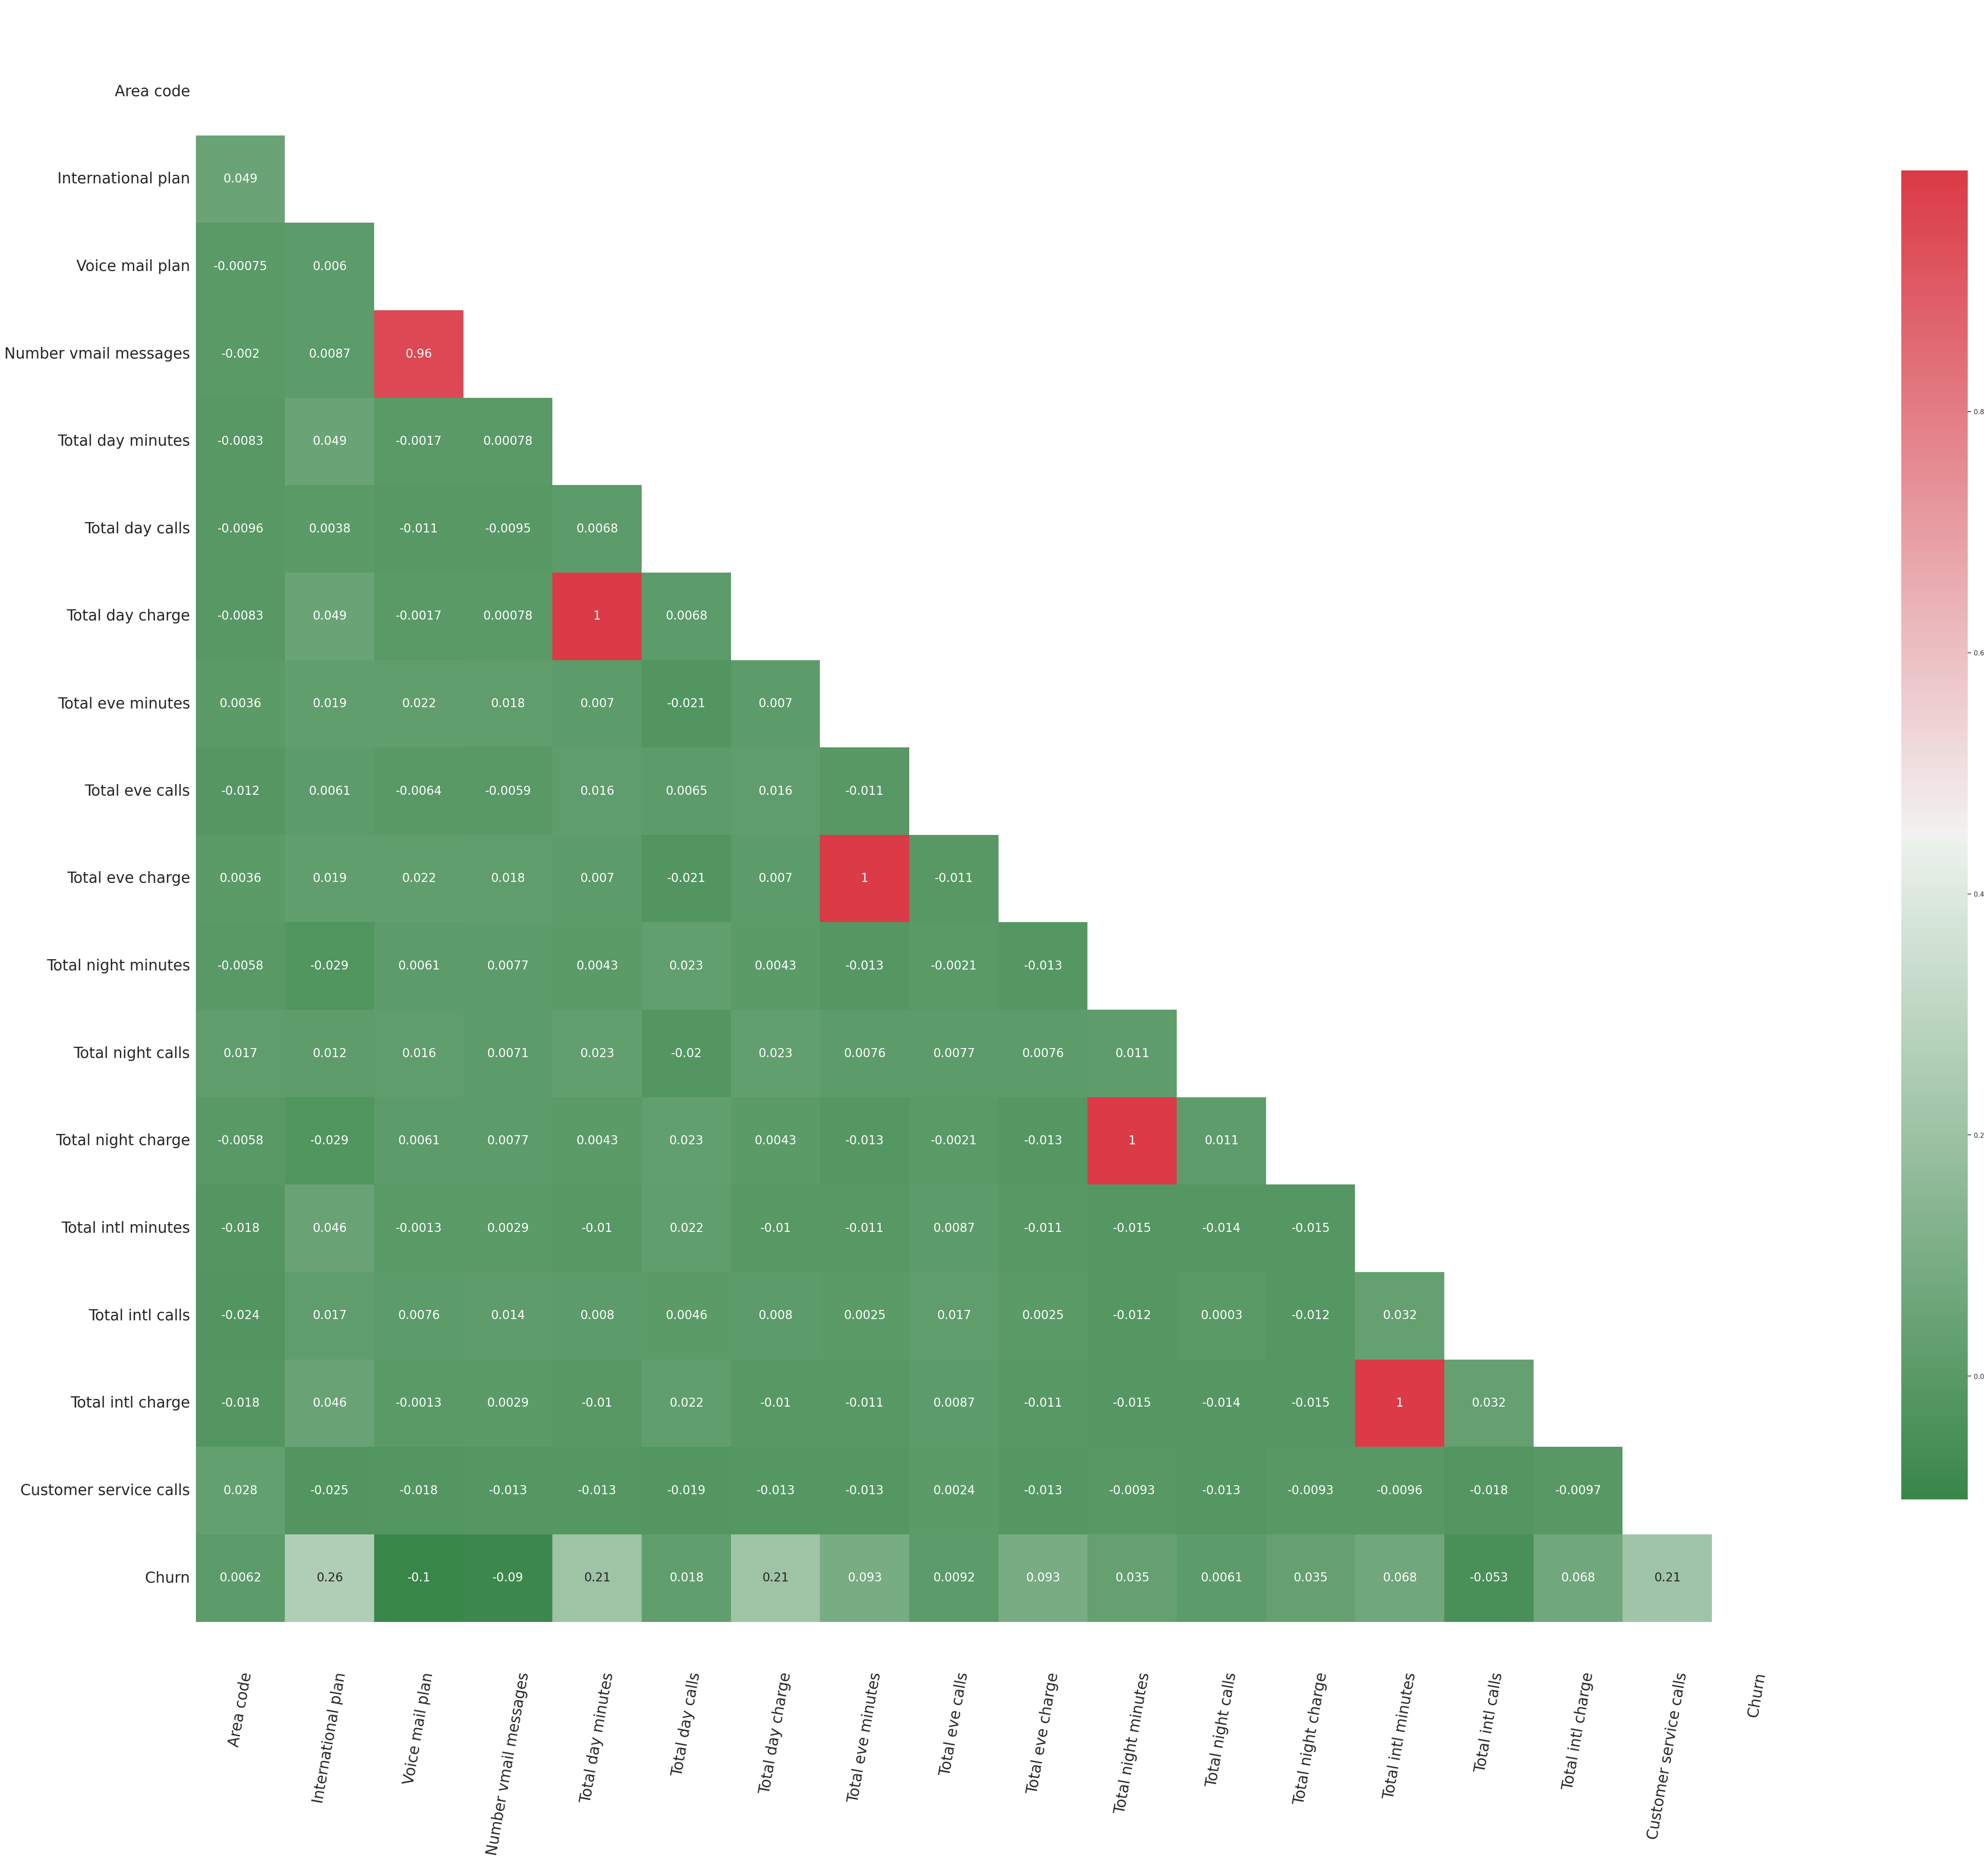

In [8]:

# Now that we have our features, let's plot them on a correlation matrix to remove anything that might cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = df.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax,
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25)

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

Figure clearly shows the relationships between the features.    “Vmail  Plan”,  Day  Charges”, "eve charges", “Night  Charges” and “International Charges'' are co-related with ‘Vmail Messages”, “Day Mins”, “Eve Mins”, “Night Mins” and “Intl Mins” respectively. These attributes are dependent on each other therefore keeping all in the dataset is not worth it. In this study one attribute is removed from each pair based on the feature importance that will be discussed later in this study.

In [10]:
dummy_variables_area = pd.get_dummies(df['Area code'])
df = pd.concat([df, dummy_variables_area], axis=1)

In [11]:
dummy_variables_state = pd.get_dummies(df['State'])
df = pd.concat([df, dummy_variables_state], axis=1)

In [12]:
df.head()

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,KS,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,OH,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,NJ,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,OH,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,OK,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.rename(columns={408:'Area_408',415:'Area_415',510:'Area_510'},inplace=True)

FEATURE IMPORTANCE

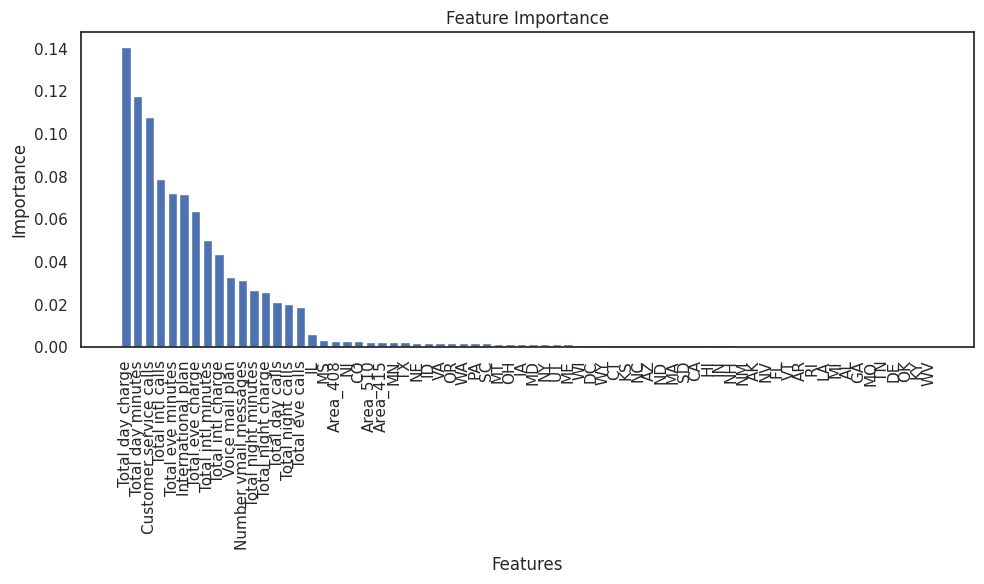

In [15]:

X = df.drop(['Churn','State','Area code'], axis=1)
y = df['Churn']

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Fit the Random Forest model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [16]:
for feature, importance in zip(sorted_features, sorted_importances):
    print(f'{feature}: {importance:.4f}')

Total day charge: 0.1406
Total day minutes: 0.1178
Customer service calls: 0.1078
Total intl calls: 0.0789
Total eve minutes: 0.0723
International plan: 0.0720
Total eve charge: 0.0637
Total intl minutes: 0.0503
Total intl charge: 0.0437
Voice mail plan: 0.0330
Number vmail messages: 0.0313
Total night minutes: 0.0271
Total night charge: 0.0257
Total day calls: 0.0214
Total night calls: 0.0202
Total eve calls: 0.0191
IL: 0.0062
MS: 0.0034
Area_408: 0.0031
NJ: 0.0030
CO: 0.0027
Area_510: 0.0026
Area_415: 0.0025
MN: 0.0024
TX: 0.0023
NE: 0.0021
ID: 0.0020
VA: 0.0019
OR: 0.0018
WA: 0.0018
PA: 0.0018
SC: 0.0018
MT: 0.0017
OH: 0.0016
IA: 0.0016
MD: 0.0015
NY: 0.0015
UT: 0.0013
ME: 0.0013
WI: 0.0012
DC: 0.0012
WY: 0.0012
CT: 0.0012
KS: 0.0012
NC: 0.0011
AZ: 0.0011
ND: 0.0010
MA: 0.0010
SD: 0.0009
CA: 0.0009
HI: 0.0009
IN: 0.0009
NH: 0.0009
NM: 0.0008
AK: 0.0008
NV: 0.0007
FL: 0.0007
VT: 0.0007
AR: 0.0006
RI: 0.0006
LA: 0.0006
MI: 0.0006
AL: 0.0006
GA: 0.0004
MO: 0.0004
TN: 0.0003
DE: 0.0002


In [28]:
for feature in sorted_features:
    print(f'{feature}')

Total day charge
Total day minutes
Customer service calls
Total intl calls
Total eve minutes
International plan
Total eve charge
Total intl minutes
Total intl charge
Voice mail plan
Number vmail messages
Total night minutes
Total night charge
Total day calls
Total night calls
Total eve calls
IL
MS
Area_408
NJ
CO
Area_510
Area_415
MN
TX
NE
ID
VA
OR
WA
PA
SC
MT
OH
IA
MD
NY
UT
ME
WI
DC
WY
CT
KS
NC
AZ
ND
MA
SD
CA
HI
IN
NH
NM
AK
NV
FL
VT
AR
RI
LA
MI
AL
GA
MO
TN
DE
OK
KY
WV


“Vmail Plan”, Day Charges”, “Night Charges” and “International Charges'' are co-related with ‘Vmail Messages”, “Day Mins”, “Eve Mins”, “Night Mins” and “Intl Mins” respectively. These attributes are dependent on each other therefore keeping all in the dataset is not worth it. In this study one attribute is removed from each pair based on the feature importance

In [18]:
df.drop(['State','Area code','Voice mail plan','Total day charge','Total intl charge','Total eve charge','Total night minutes'], axis=1,inplace=True)

In [19]:
df.head()

,International plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night calls,Total night charge,Total intl minutes,Total intl calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,25,265.1,110,197.4,99,91,11.01,10.0,3,...,0,0,0,0,0,0,0,0,0,0
1,0,26,161.6,123,195.5,103,103,11.45,13.7,3,...,0,0,0,0,0,0,0,0,0,0
2,0,0,243.4,114,121.2,110,104,7.32,12.2,5,...,0,0,0,0,0,0,0,0,0,0
3,1,0,299.4,71,61.9,88,89,8.86,6.6,7,...,0,0,0,0,0,0,0,0,0,0
4,1,0,166.7,113,148.3,122,121,8.41,10.1,3,...,0,0,0,0,0,0,0,0,0,0


LOGISTIC

In [33]:
x = df.drop(['Churn',"IL",
"MS",
"Area_408",
"NJ",
"CO",
"Area_510",
"Area_415","MN",
"TX",
"NE",
"ID",
"VA",
"OR",
"WA",
"PA",
"SC",
"MT",
"OH",
"IA",
"MD",
"NY",
"UT",
"ME",
"WI",
"DC",
"WY",
"CT",
"KS",
"NC",
"AZ",
"ND",
"MA",
"SD",
"CA",
"HI",
"IN",
"NH",
"NM",
"AK",
"NV",
"FL",
"VT",
"AR",
"RI",
"LA",
"MI",
"AL",
"GA",
"MO",
"TN",
"DE",
"OK",
"KY"
,"WV"],axis=1).values
y= df['Churn'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [35]:

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)


In [23]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print (X_train[0:10, :])'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler(feature_range = (0,1))\n\nX_train= scaler.fit_transform(X_train)\nX_test = scaler.fit_transform(X_test)\nprint (X_train[0:10, :])'

In [67]:
y_train_df= pd.DataFrame(y_train)
y_train_df.value_counts(normalize=True)

0    0.852741
1    0.147259
dtype: float64

In [38]:

classifier = LogisticRegression(class_weight={0:0.15,1:0.85})
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

# ROC- AUC score
print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test,y_pred))
#Precision score
print("precision score  test dataset:  ", precision_score(y_test,y_pred))
#Recall Score
print("Recall score  test dataset:  ", recall_score(y_test,y_pred))
#f1 score
print("f1 score  test dataset :  ", f1_score(y_test,y_pred))
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[546 173]
 [ 28  87]]
ROC-AUC score  test dataset:   0.7579548890367056
precision score  test dataset:   0.3346153846153846
Recall score  test dataset:   0.7565217391304347
f1 score  test dataset :   0.46399999999999997
Accuracy :  0.7589928057553957


In [37]:
#Hyperparameter tuning


# define model/create instance

#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)

#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20,30,50,100], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
#folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= classifier,param_grid=param,scoring="f1",cv=5,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
22500 fits failed out of a total of 45000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErr

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 0.14, 1: 0.85}),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20, 30, 50, 100],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.992064128256513},
                                          {0: 0.009919...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                                          {0: 0.04959919839679359,
                                           1: 0.9504008016032064},
                                          {0: 0.05158316633266533,
                                           1: 0.9484168336673346},
                                          {0: 0.05356713426853708,
                                           1: 0.9464328657314629},
                                          {0: 0.055551102204408814,
                                           1: 0.9444488977955912},
                                          {0: 0.05753507014028056,
                                           1: 0.9424649298597194}, ...],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

In [39]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.5140979297179352
Best hyperparameters:  {'C': 1, 'class_weight': {0: 0.1864929859719439, 1: 0.8135070140280561}, 'penalty': 'l2'}


In [50]:
# Retrieve the best model with optimized hyperparameters
best_model = model.best_estimator_

# Evaluate the best model on the test set
y_pred_ht = best_model.predict(X_test)  # X_test is your test data
auc_score = roc_auc_score(y_test, y_pred_ht)

print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred_ht))
print("Test AUC Score: ", auc_score)

#Precision score
print("precision score  test dataset:  ", precision_score(y_test,y_pred_ht))
#Recall Score
print("Recall score  test dataset:  ", recall_score(y_test,y_pred_ht))
#f1 score
print("f1 score  test dataset :  ", f1_score(y_test,y_pred_ht))
print ("Accuracy : ", accuracy_score(y_test, y_pred_ht))

Confusion Matrix : 
 [[574 145]
 [ 33  82]]
Test AUC Score:  0.755687246779948
precision score  test dataset:   0.36123348017621143
Recall score  test dataset:   0.7130434782608696
f1 score  test dataset :   0.47953216374269
Accuracy :  0.7865707434052758


In [41]:
# UNDER SAMPLING, OVER SAMPLING



# Perform undersampling using RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)  # Undersample to achieve a 50:50 class ratio
X_undersampled, y_undersampled = rus.fit_resample(x, y)

print("Before undersampling:")
print(df['Churn'].value_counts())

print("\nAfter undersampling:")
print(pd.Series(y_undersampled).value_counts())

# Perform oversampling using SMOTE
smote = SMOTE(sampling_strategy=1)  # Oversample to achieve a 1:1 class ratio
X_oversampled, y_oversampled = smote.fit_resample(x, y)

print("\nBefore oversampling:")
print(df['Churn'].value_counts())

print("\nAfter oversampling:")
print(pd.Series(y_oversampled).value_counts())

Before undersampling:
0    2850
1     483
Name: Churn, dtype: int64

After undersampling:
0    483
1    483
dtype: int64

Before oversampling:
0    2850
1     483
Name: Churn, dtype: int64

After oversampling:
0    2850
1    2850
dtype: int64


LOGISTIC WITH UNDERSAMPLING DATA

In [42]:

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersampled, y_undersampled, test_size = 0.25, random_state = 0)

In [43]:
X_train_us = sc_x.fit_transform(X_train_us)
X_test_us = sc_x.transform(X_test_us)

In [44]:
#logistic using undersampling
classifier_us = LogisticRegression(random_state=0)
classifier_us.fit(X_train_us, y_train_us)
y_pred_us = classifier_us.predict(X_test_us)


print ("Confusion Matrix : \n", confusion_matrix(y_test_us, y_pred_us))

#ROC- AUC score
print("ROC-AUC score test dataset: ", roc_auc_score(y_test_us, y_pred_us))

#Precision score
print("precision score test dataset: ", precision_score(y_test_us, y_pred_us))

#Recall Score
print("Recall score test dataset: ", recall_score(y_test_us, y_pred_us))

#f1 score
print("f1 score test dataset : ", f1_score(y_test_us, y_pred_us))
print ("Accuracy : ", accuracy_score(y_test_us, y_pred_us))

Confusion Matrix : 
 [[82 35]
 [27 98]]
ROC-AUC score test dataset:  0.7424273504273503
precision score test dataset:  0.7368421052631579
Recall score test dataset:  0.784
f1 score test dataset :  0.7596899224806203
Accuracy :  0.743801652892562


LOGISTIC WITH OVER SAMPLING

In [45]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversampled, y_oversampled, test_size = 0.25, random_state = 0)

In [46]:
X_train_os = sc_x.fit_transform(X_train_os)
X_test_os = sc_x.transform(X_test_os)


In [51]:
#logistic using oversampling

classifier_os = LogisticRegression(random_state = 0)
classifier_os.fit(X_train_os, y_train_os)
y_pred_os = classifier_os.predict(X_test_os)


print ("Confusion Matrix : \n", confusion_matrix(y_test_os, y_pred_os))

# ROC- AUC score
print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test_os, y_pred_os))
#Precision score
print("precision score  test dataset:  ", precision_score(y_test_os, y_pred_os))
#Recall Score
print("Recall score  test dataset:  ", recall_score(y_test_os, y_pred_os))
#f1 score
print("f1 score  test dataset :  ", f1_score(y_test_os, y_pred_os))
print ("Accuracy : ", accuracy_score(y_test_os, y_pred_os))


Confusion Matrix : 
 [[564 139]
 [155 567]]
ROC-AUC score  test dataset:   0.7937972598637419
precision score  test dataset:   0.8031161473087819
Recall score  test dataset:   0.7853185595567868
f1 score  test dataset :   0.7941176470588236
Accuracy :  0.7936842105263158


RANDOM FOREST

In [79]:
x = df.drop(['Churn','Area_408','Area_415','Area_510'],axis=1).values
y = df['Churn'].values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (accuracy_score(y_test, prediction_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9532374100719424


In [54]:

print ("Confusion Matrix : \n", confusion_matrix(y_test, prediction_test))

# ROC- AUC score
print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, prediction_test))

#Precision score
print("precision score  test dataset:  ", precision_score(y_test,prediction_test))
#Recall Score
print("Recall score  test dataset:  ", recall_score(y_test,prediction_test))
#f1 score
print("f1 score  test dataset :  ", f1_score(y_test,prediction_test))


Confusion Matrix : 
 [[713   6]
 [ 33  82]]
ROC-AUC score  test dataset:   0.8523492773780008
precision score  test dataset:   0.9318181818181818
Recall score  test dataset:   0.7130434782608696
f1 score  test dataset :   0.8078817733990147


In [55]:
model_rf.fit(X_train_os,y_train_os)
test_prediction_os = model_rf.predict(X_test_os)
print (accuracy_score(y_test_os, test_prediction_os))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9101754385964912


In [56]:
print ("Confusion Matrix : \n", confusion_matrix(y_test_os, test_prediction_os))

# ROC- AUC score
print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test_os, test_prediction_os))
#Precision score
print("precision score  test dataset:  ", precision_score(y_test_os, test_prediction_os))
#Recall Score
print("Recall score  test dataset:  ", recall_score(y_test_os, test_prediction_os))
#f1 score
print("f1 score  test dataset :  ", f1_score(y_test_os, test_prediction_os))

Confusion Matrix : 
 [[645  58]
 [ 70 652]]
ROC-AUC score  test dataset:   0.9102717676124878
precision score  test dataset:   0.9183098591549296
Recall score  test dataset:   0.9030470914127424
f1 score  test dataset :   0.9106145251396649


In [57]:
model_rf.fit(X_train_us,y_train_us)
test_prediction_us = model_rf.predict(X_test_us)
print (accuracy_score(y_test_us, test_prediction_us))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8884297520661157


In [58]:
print ("Confusion Matrix : \n", confusion_matrix(y_test_us, test_prediction_us))

# ROC- AUC score
print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test_us, test_prediction_us))

#Precision score
print("precision score  test dataset:  ", precision_score(y_test_us, test_prediction_us))
#Recall Score
print("Recall score  test dataset:  ", recall_score(y_test_us, test_prediction_us))
#f1 score
print("f1 score  test dataset :  ", f1_score(y_test_us, test_prediction_us))

Confusion Matrix : 
 [[105  12]
 [ 15 110]]
ROC-AUC score  test dataset:   0.8887179487179487
precision score  test dataset:   0.9016393442622951
Recall score  test dataset:   0.88
f1 score  test dataset :   0.8906882591093117


Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
preds3 = dt.predict(X_test)
accuracy_score(y_test, preds3)

0.9112709832134293

In [61]:

print ("Confusion Matrix : \n", confusion_matrix(y_test, preds3))

# ROC- AUC score
print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, preds3))

#Precision score
print("precision score  test dataset: ", precision_score(y_test,preds3))
#Recall Score
print("Recall score  test dataset: ", recall_score(y_test,preds3))
#f1 score
print("f1 score  test dataset : ", f1_score(y_test,preds3))

Confusion Matrix : 
 [[669  50]
 [ 24  91]]
ROC-AUC score  test dataset:   0.8608816593094273
precision score  test dataset:  0.6453900709219859
Recall score  test dataset:  0.7913043478260869
f1 score  test dataset :  0.7109375


In [62]:
dt.fit(X_train_us,y_train_us)
test_prediction_us_dt = dt.predict(X_test_us)
print (accuracy_score(y_test_us, test_prediction_us_dt))

0.8057851239669421


In [63]:
print ("Confusion Matrix : \n", confusion_matrix(y_test_us, test_prediction_us_dt))

# ROC- AUC score
print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test_us, test_prediction_us_dt))

#Precision score
print("precision score  test dataset:  ", precision_score(y_test_us, test_prediction_us_dt))
#Recall Score
print("Recall score  test dataset:  ", recall_score(y_test_us, test_prediction_us_dt))
#f1 score
print("f1 score  test dataset :  ", f1_score(y_test_us, test_prediction_us_dt))

Confusion Matrix : 
 [[ 86  31]
 [ 16 109]]
ROC-AUC score  test dataset:   0.8035213675213676
precision score  test dataset:   0.7785714285714286
Recall score  test dataset:   0.872
f1 score  test dataset :   0.8226415094339622


In [64]:
dt.fit(X_train_os,y_train_os)
test_prediction_os_dt = dt.predict(X_test_os)
print (accuracy_score(y_test_os, test_prediction_os_dt))

0.9361403508771929


In [65]:
print ("Confusion Matrix : \n", confusion_matrix(y_test_os, test_prediction_os_dt))

# ROC- AUC score
print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test_os, test_prediction_os_dt))

#Precision score
print("precision score  test dataset:  ", precision_score(y_test_os, test_prediction_os_dt))
#Recall Score
print("Recall score  test dataset:  ", recall_score(y_test_os, test_prediction_os_dt))
#f1 score
print("f1 score  test dataset :  ", f1_score(y_test_os, test_prediction_os_dt))

Confusion Matrix : 
 [[650  53]
 [ 38 684]]
ROC-AUC score  test dataset:   0.9359886201991463
precision score  test dataset:   0.9280868385345997
Recall score  test dataset:   0.9473684210526315
f1 score  test dataset :   0.9376285126799178


XGBOOST

In [68]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_os, y_train_os)
preds2 = model.predict(X_test_os)
accuracy_score(y_test_os, preds2)

0.9705263157894737

In [69]:
#Precision score
print("precision score  test dataset: ", precision_score(y_test_os,preds2))
#Recall Score
print("Recall score  test dataset: ", recall_score(y_test_os,preds2))
#f1 score
print("f1 score  test dataset : ", f1_score(y_test_os,preds2))

precision score  test dataset:  0.9788732394366197
Recall score  test dataset:  0.9626038781163435
f1 score  test dataset :  0.9706703910614525


AdaBoost

In [75]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train_os,y_train_os)
preds1 = model.predict(X_test_os)
accuracy_score(y_test_os, preds1)

0.8947368421052632

In [77]:
#Precision score
print("precision score  test dataset: ", precision_score(y_test_os,preds1))
#Recall Score
print("Recall score  test dataset: ", recall_score(y_test_os,preds1))
#f1 score
print("f1 score  test dataset : ", f1_score(y_test_os,preds1))

precision score  test dataset:  0.9144927536231884
Recall score  test dataset:  0.8739612188365651
f1 score  test dataset :  0.8937677053824362
